# WEB SCRAPING

In [2]:
import threading
import requests
import random
import time
import pandas as pd

from bs4 import BeautifulSoup

In [ ]:
immobiliare = requests.get("https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=1")
page = BeautifulSoup(immobiliare.text, "html5lib")
page

In [ ]:
n = page.find_all("span", class_ = "pagination__label")
n = n[len(n) - 1] #last element
n = int(n.getText())

In [ ]:
links = []
notdw = []

In [ ]:
def getLinksFromPage(url):
    time.sleep(round(random.uniform(0.01, 0.4), 2))
    try:
        immobiliare = requests.get(url)
    except:
        notdw.append(url)
        return
    result = BeautifulSoup(immobiliare.text, "html5lib")
    x = result.find_all("p", class_ = "titolo")
    
    links.extend([item.find('a').get('href') for item in x if item.find('a').get('href').startswith("https://www.immobiliare.it/")])


In [ ]:
threads = []
    
for i in range(n): #n
    url = "https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=" + str(i + 1)
    t = threading.Thread(target=getLinksFromPage, args=(url,))
    threads.append(t)
    t.start()

In [ ]:
def areThreadsAlive(threads):
    for thread in threads:
        if(thread.isAlive() == True):
            return "Not finished yet"
    
    return "All threads are completed"

In [ ]:
notdw

In [ ]:
len(notdw)

In [ ]:
areThreadsAlive(threads)

In [ ]:
len(links)

In [ ]:
threads = []
tryagain = notdw.copy()
notdw = []
for url in tryagain:
    t = threading.Thread(target=getLinksFromPage, args=(url,))
    threads.append(t)
    t.start()

In [ ]:
linkfile = open('data/links.txt', 'w')
for link in links:
    linkfile.write("%s\n" % link)
linkfile.close()

In [ ]:
feautures = []
descr = []
notdw = []
def getDataFromLinks(i, url):
    time.sleep(round(random.uniform(0.01, 0.4), 2))
    # Get the webpage
    try:
        info = requests.get(url)
    except:
        notdw.append(url)
        return
    info = BeautifulSoup(info.text, "html5lib")
    
    # Get the feauters needed
    feauts = info.find_all("div", class_ = "im-property__features")
    feautList = [item.find_all("span") for item in feauts]  
    listfeautures = info.find("ul", class_ = "features__list")
    try:
        
        price = info.find_all("li", class_ = "features__price")[0].find('span', recursive=False).getText()
        
        room = None
        bathroom = None
        floor = None
        surface = None

        for elem in listfeautures.findAll('li'):
            if str(elem).find("locali") != -1:
                room = elem.find('span').getText()

            elif (str(elem).find("bagni") != -1):
                bathroom = elem.find('span').getText()

            elif (str(elem).find("piano") != -1):
                floor = elem.find('abbr').getText()

            elif (str(elem).find("superficie") != -1):
                surface =  elem.find('span').getText()

            if((room is not None) and\
               (bathroom is not None) and\
               (floor is not None) and\
               (surface is not None)):
            # Get the description 
                descr.extend([[url, info.find_all("div", class_ = "description-text")[0] \
                       .getText()\
                       .replace('\n', ' ')\
                       .replace('                                              ', '')\
                       .replace('                      ','')\
                      ]])
                feautures.extend([[url, price, room, surface, bathroom, floor]])

    except:
        return

In [ ]:
threads = []

for i, url in enumerate(links):
    t = threading.Thread(target=getDataFromLinks, args=(i,url,))
    threads.append(t)
    t.start()

In [ ]:
len(descr)

In [ ]:
len(notdw)

In [ ]:
print(areThreadsAlive(threads))

In [ ]:
dfFe = pd.DataFrame(feautures, columns = ["Url", "Price", "Room", "Surface", "Bathroom", "Floor"])
dfDe = pd.DataFrame(descr, columns = ["Url", "Descr"])

In [ ]:
dfFe.head()

In [ ]:
dfDe.head()

In [ ]:
len(notdw)

In [ ]:
threads = []
todw = notdw.copy()
notdw = []

for i, url in enumerate(todw):
    t = threading.Thread(target=getDataFromLinks, args=(i,url,))
    threads.append(t)
    t.start()

In [ ]:
len(notdw)

In [ ]:
dfFe.head()

In [ ]:
dfFe.isnull().sum()

In [ ]:
dfFe.to_csv('data/feautures.csv', sep=',', na_rep='')

In [ ]:
dfDe.to_csv('data/descriptions.csv', sep=',', na_rep='')

In [18]:
dfDe = pd.read_csv('data/descriptions.csv', index_col = 0)
dfFe = pd.read_csv('data/feautures.csv', index_col = 0)

In [19]:
dfFe.head()

,Url,Price,Room,Surface,Bathroom,Floor
0,https://www.immobiliare.it/69032803-Vendita-Bi...,€ 169.000,2,72.0,1,T \n
1,https://www.immobiliare.it/69032803-Vendita-Bi...,€ 169.000,2,72.0,1,T \n
2,https://www.immobiliare.it/69783036-Vendita-At...,€ 520.000,4,120.0,3,A \n
3,https://www.immobiliare.it/69783036-Vendita-At...,€ 520.000,4,120.0,3,A \n
4,https://www.immobiliare.it/60154116-Vendita-Mo...,€ 195.000,1,38.0,1,1 \n


In [20]:
dfFe = dfFe[dfFe.Bathroom != 'al mese']

In [21]:
dfFe.head(5)

,Url,Price,Room,Surface,Bathroom,Floor
0,https://www.immobiliare.it/69032803-Vendita-Bi...,€ 169.000,2,72.0,1,T \n
1,https://www.immobiliare.it/69032803-Vendita-Bi...,€ 169.000,2,72.0,1,T \n
2,https://www.immobiliare.it/69783036-Vendita-At...,€ 520.000,4,120.0,3,A \n
3,https://www.immobiliare.it/69783036-Vendita-At...,€ 520.000,4,120.0,3,A \n
4,https://www.immobiliare.it/60154116-Vendita-Mo...,€ 195.000,1,38.0,1,1 \n


In [22]:
set(dfFe['Floor'])

{'10\xa0    \n',
 '11+\xa0    \n',
 '1\xa0    \n',
 '2\xa0    \n',
 '3\xa0    \n',
 '4\xa0    \n',
 '5\xa0    \n',
 '6\xa0    \n',
 '7\xa0    \n',
 '8\xa0    \n',
 '9\xa0    \n',
 'A\xa0    \n',
 'R\xa0    \n',
 'S\xa0    \n',
 'T\xa0    \n'}

In [23]:
set(dfFe['Surface'])

{1.0,
 1.1,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.6,
 2.74,
 7.0,
 8.0,
 9.0,
 10.0,
 14.0,
 15.0,
 16.0,
 18.0,
 20.0,
 21.0,
 22.0,
 25.0,
 26.0,
 27.0,
 28.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0,
 14

In [24]:
dfFe.groupby(['Bathroom']).count()

,Url,Price,Room,Surface,Floor
Bathroom,,,,,
1,6644,6644,6644,6644,6644
2,4573,4573,4573,4573,4573
3+,286,286,286,286,286
3,921,921,921,921,921
4,11,11,11,11,11


In [25]:
pd.options.mode.chained_assignment = None  # default='warn'
dfFe = dfFe.replace(r'\  \n',' ', regex=True).replace(r'\xa0', '').replace(r'\s+', '', regex=True)
dfFe.Price =  pd.to_numeric(dfFe.Price\
                            .replace('€ ', '')\
                            .replace("[^0-9]", '', regex = True))

#All ads with more than 5 rooms, now will become 6 instead of 5+
dfFe.Room =   pd.to_numeric(dfFe.Room.replace('5\+', '6').replace("[^0-9]", '', regex = True)) 

#All ads with more than 3 bathroome, now will become 4 instead of 3+
dfFe.Bathroom =  pd.to_numeric(dfFe.Bathroom.replace('3\+', '4').replace("[^0-9]", '', regex = True))

dfFe.Surface =  pd.to_numeric(dfFe.Surface.replace("[^0-9]", '', regex = True))
dfFe.Floor =  pd.to_numeric(dfFe.Floor.replace('11+', '11')
                            .replace('A', '12')\
                            .replace('R', '1')\
                            .replace('S', '-1')\
                            .replace('T', '0'))

#  'A\xa0    \n',
#  'R\xa0    \n',
#  'S\xa0    \n',
#  'T\xa0    \n'}

In [26]:
dfFe.head()

,Url,Price,Room,Surface,Bathroom,Floor
0,https://www.immobiliare.it/69032803-Vendita-Bi...,169000.0,2,72.0,1,0
1,https://www.immobiliare.it/69032803-Vendita-Bi...,169000.0,2,72.0,1,0
2,https://www.immobiliare.it/69783036-Vendita-At...,520000.0,4,120.0,3,12
3,https://www.immobiliare.it/69783036-Vendita-At...,520000.0,4,120.0,3,12
4,https://www.immobiliare.it/60154116-Vendita-Mo...,195000.0,1,38.0,1,1


There's one house that has the value of 650000000 euros. We belive this is a mistake, so we will proceed to remove it since it messes up with the clustering.

In [27]:
dfFe.loc[(dfFe['Price'] > 10000000)]

,Url,Price,Room,Surface,Bathroom,Floor


We want to consider 10000000 euros an improbable amount for a house in Rome. 
As we can see, in our list just 3 houses have a price that is set over that amount:
- https://www.immobiliare.it/65441890-immobili_commerciali-magazzino-in-vendita-Roma.html,11500000.0,6,15695,4,1
- https://www.immobiliare.it/69369480-Vendita-Appartamento-via-Ambrogio-Traversari-Roma.html
- https://www.immobiliare.it/66708185-Vendita-Appartamento-via-Pietro-Mascagni-158-Roma.html

The first one was a magazine, and it is not available anymore, so probably Immobiliare removed it already.
The second one is an apartment where the owner set a price of 650000000 euro, clearly a mistake since the apartment is not worth that amount (probably there should be 3 zeros less).
The last one has a pricetag of 11111111 and looking at the ad we can read that the owner is open to discuss a price, so set just one randomly for the website (since it is a required value).

We want just to remove these values, to have a better clustering.

In [28]:
dfFe.loc[(dfFe['Price'])]

,Url,Price,Room,Surface,Bathroom,Floor


In [29]:
dfFe.isnull().sum()

Url           0
Price       117
Room          0
Surface       0
Bathroom      0
Floor         0
dtype: int64

In [30]:
dfFe.loc[(dfFe['Price'] > 10000000)]

,Url,Price,Room,Surface,Bathroom,Floor


In [31]:
dfFe.to_csv('data/feauturesCleaned.csv', sep=',', na_rep='')

dfFe = pd.read_csv('data/feauturesCleaned.csv', sep=',', index_col=0)
dfFe.head()

,Url,Price,Room,Surface,Bathroom,Floor
0,https://www.immobiliare.it/69032803-Vendita-Bi...,169000.0,2,72.0,1,0
1,https://www.immobiliare.it/69032803-Vendita-Bi...,169000.0,2,72.0,1,0
2,https://www.immobiliare.it/69783036-Vendita-At...,520000.0,4,120.0,3,12
3,https://www.immobiliare.it/69783036-Vendita-At...,520000.0,4,120.0,3,12
4,https://www.immobiliare.it/60154116-Vendita-Mo...,195000.0,1,38.0,1,1


In [100]:
descr = {dfDe.index[elem] : elem for elem in dfDe['Descr']}
descr

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import string
from nltk.tokenize import RegexpTokenizer
#download the stop words
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/milpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
nltk.download("stopwords")
stopwords = stopwords.words('italian')
st = nltk.stem.SnowballStemmer("italian")
def clean(doc):
    tokenizer = RegexpTokenizer(r'\w+')
    doc = tokenizer.tokenize(doc) #tokenize the query for stop word and punctuation
    doc = [t for t in doc if t not in stopwords and t.isalpha()] #remove stopword
    doc = [st.stem(word) for word in doc] #stemming
    
    return doc



#tostem = ([x.lower() for x in text.split(' ') if x.lower() not in stopwords.words(languages[lan]) and x.isalpha()])
#docdict[i] = [nltk.stem.SnowballStemmer(languages[lan]).stem(word) for word in tostem]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/milpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
aa = []
for i in descr:
    aa += [clean(i)]

In [38]:
cc = set([i for item in aa for i in item])
cc

{'anni',
 'produtt',
 'mamm',
 'nibby',
 'tecnolog',
 'xl',
 'exposur',
 'roccaroman',
 'va',
 'approcc',
 'vorhanden',
 'ambi',
 'sinuess',
 'residenzial',
 'rosar',
 'cr',
 'par',
 'minerb',
 'soratt',
 'foyer',
 'beams',
 'lüminos',
 'tril',
 'grat',
 'compromess',
 'sibillin',
 'nightlif',
 'investimentov',
 'anwesen',
 'ipoge',
 'polib',
 'pavimental',
 'fit',
 'any',
 'collored',
 'fontanil',
 'oas',
 'fortement',
 'grünen',
 'tuton',
 'andiam',
 'estern',
 'succession',
 'amen',
 'garamp',
 'chang',
 'insomm',
 'lavato',
 'scandal',
 'falb',
 'lamb',
 'commercial',
 'esterzil',
 'ercol',
 'compos',
 'voi',
 'capass',
 'entièrement',
 'meritoimmobil',
 'asciugaman',
 'dismpegn',
 'foc',
 'calm',
 'imped',
 'gastald',
 'ipotes',
 'rec',
 'sicherheitsdienst',
 'tratamient',
 'c',
 'tremil',
 'schönen',
 'fedimcas',
 'strepit',
 'pomeridian',
 'vin',
 'realeimmobil',
 'allag',
 'corv',
 'finestrell',
 'sas',
 'ragon',
 'mog',
 'tancredicas',
 'segund',
 'gut',
 'filobus',
 'permutas

In [39]:
tfidf = pd.DataFrame(columns = list(cc))

In [40]:
import math
def tf_idf(word,doc,D,N):
    f = doc.count(word) / len(doc)
    tfidf = math.log(D/N)*f
    
    return float(tfidf)

In [41]:
id_descr = {i : d for i,d in enumerate(descr)}

In [42]:
adjacency = pd.DataFrame(0, index = id_descr.keys(), columns = list(cc), dtype= float)

In [43]:
for i, k in enumerate(aa):
    for j in cc:
        if j in k:
            adjacency.at[i,j] = 1

In [47]:
adjacency.head()

,anni,produtt,mamm,nibby,tecnolog,xl,exposur,roccaroman,va,approcc,...,danil,indiendent,valutim,belfort,rilev,societ,chenz,bruc,mobil,marguer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
count_word = adjacency.sum()

In [49]:
D = len(adjacency.index)
for i, k in enumerate(aa):
    for j in cc:
        if adjacency.at[i,j] == 1:
            adjacency.at[i,j] = tf_idf(j, k, D, count_word[j])
            #print(tf_idf(j, k, D, count_word[j]))

In [50]:
adjacency.head()

,anni,produtt,mamm,nibby,tecnolog,xl,exposur,roccaroman,va,approcc,...,danil,indiendent,valutim,belfort,rilev,societ,chenz,bruc,mobil,marguer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017146,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017146,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [54]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [55]:
tokmean = dfFe.drop(['Url'], axis=1)
tokmean.isnull().sum()

Price       117
Room          0
Surface       0
Bathroom      0
Floor         0
dtype: int64

In [56]:
tokmean.loc[(tokmean['Price'] > 10000000)]

,Price,Room,Surface,Bathroom,Floor


In [57]:
tokmean = tokmean.dropna()
tokmean.isnull().sum()
len(tokmean)

12318

In [58]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(tokmean.values)
kmeans.labels_

array([1, 1, 0, ..., 0, 3, 1], dtype=int32)

In [59]:
kmeans.cluster_centers_

array([[5.85957768e+05, 4.13735876e+00, 1.40723552e+02, 2.01730226e+00,
        3.41031073e+00],
       [2.28667710e+05, 2.83093401e+00, 8.23489001e+01, 1.30841875e+00,
        2.63560981e+00],
       [2.47821481e+06, 4.86666667e+00, 2.86064741e+02, 2.75555556e+00,
        4.76296296e+00],
       [1.26282059e+06, 4.73846154e+00, 2.10925231e+02, 2.59384615e+00,
        4.01692308e+00],
       [5.75277778e+06, 5.00000000e+00, 4.90833333e+02, 3.00000000e+00,
        6.72222222e+00]])

In [60]:
kmeans.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>

In [61]:
kmeans.n_clusters

5

In [62]:
kmeans.labels_

array([1, 1, 0, ..., 0, 3, 1], dtype=int32)

In [63]:
kmeans.score(tokmean.values)

-236735046555491.25

In [65]:
kmeans.inertia_

236735046555491.1

In [66]:
k = 15
inertia = []
for i in range(k):
    inertia.append(KMeans(n_clusters=i + 1, random_state=0).fit(tokmean.values).score(tokmean.values))

inertia

[-2172210292576838.2,
 -996279674007599.0,
 -586801520106280.2,
 -355458493896770.6,
 -236735046555491.25,
 -171220600285041.94,
 -130703304834448.97,
 -104561925910021.38,
 -79493877619328.4,
 -62124742660303.125,
 -49727271996483.72,
 -41457194698528.33,
 -34418440350795.64,
 -29724327717866.09,
 -25768522857346.55]

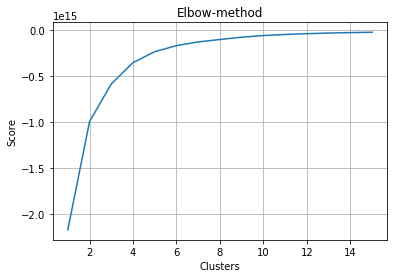

In [67]:
fig, ax = plt.subplots()
ax.plot([i+1 for i in range(k)],inertia)

ax.set(xlabel='Clusters', ylabel='Score',
       title='Elbow-method')
ax.grid()

The optimum number of clusters seems to be 4

In [68]:
dfFeClust = dfFe.dropna().copy()

In [69]:
len(dfFeClust)

12318

In [70]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(tokmean.values)
dfFeClust['Cluster'] = kmeans.labels_
kmeans.labels_

array([1, 1, 0, ..., 0, 3, 1], dtype=int32)

In [90]:
dfFeClust

,Url,Price,Room,Surface,Bathroom,Floor,Cluster
0,https://www.immobiliare.it/69032803-Vendita-Bi...,169000.0,2,72.0,1,0,1
1,https://www.immobiliare.it/69032803-Vendita-Bi...,169000.0,2,72.0,1,0,1
2,https://www.immobiliare.it/69783036-Vendita-At...,520000.0,4,120.0,3,12,0
3,https://www.immobiliare.it/69783036-Vendita-At...,520000.0,4,120.0,3,12,0
4,https://www.immobiliare.it/60154116-Vendita-Mo...,195000.0,1,38.0,1,1,1
5,https://www.immobiliare.it/60154116-Vendita-Mo...,195000.0,1,38.0,1,1,1
6,https://www.immobiliare.it/60679448-Vendita-Bi...,195000.0,2,60.0,1,1,1
7,https://www.immobiliare.it/60679448-Vendita-Bi...,195000.0,2,60.0,1,1,1
8,https://www.immobiliare.it/70373906-Vendita-Tr...,279000.0,3,73.0,1,12,1
9,https://www.immobiliare.it/68815695-Vendita-Bi...,177000.0,2,70.0,2,1,1


In [72]:
dimClusts = {}
for i in range(4):
    dimClusts[i] = len(dfFeClust.loc[(dfFeClust['Cluster'] == i)])
dimClusts

{0: 2789, 1: 8884, 2: 51, 3: 594}

In [76]:
kmeansD = KMeans(n_clusters=4, random_state=0).fit(adjacency.values)

In [77]:
kmeansD.labels_

12435

In [ ]:
# dfFeClust['ClusterDescr'] = kmeansD.labels_

In [87]:
idx = dfDe.index.intersection(dfFeClust.index)

idx

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            12425, 12426, 12427, 12428, 12429, 12430, 12431, 12432, 12433,
            12434],
           dtype='int64', length=12318)

In [89]:
dfDe = dfDe.iloc[idx]

In [73]:
import libclust
import importlib
importlib.reload(libclust)

<module 'libclust' from '/Users/milpro/Desktop/Universita/ADM_Aris/HW4/libclust.py'>

In [74]:
X = tokmean.values
k = 4
selfCluster = {}
myclust = libclust.KMeans(X, k)
selfCluster = myclust.giveCluster()

[295596.50426623377, 812019.5777777778, 123075.3444117647, 46499.707347629796]


In [75]:
dimClusts = {}
for i in range(4):
    dimClusts[i] = len(selfCluster[i])
dimClusts

{0: 616, 1: 54, 2: 2788, 3: 8860}

In [ ]:
np.array(myclust.giveClusterArray())

In [ ]:
dfFeClust['HMCluster'] = np.array(myclust.giveClusterArray())

In [ ]:
dfFeClust.head()